
# HW3: Simple Linear Regression with Sacramento Real Estate Data

---

In this HW you will apply your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

**You are expected to create and enter MULTIPLE relevant cells in each part.**   
**Explain with markdown cells any reason that support your finding or action.**   
**Points may be deducted if no appropriate interpretation is provided.**

*you may download the dataset used in this HW from here: 1RW87ZmENMHrS8K9iPPwmnHfYxmb-w0Qr*


### 1. Read in the Sacramento housing data set.

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'17HbHBVlcAsqs0Yi7IGnZAt5u2-sl9B7L'}) # replace the id with id of file you want to access
downloaded.GetContentFile('drug-use-by-age.csv') 
downloaded = drive.CreateFile({'id':'1RW87ZmENMHrS8K9iPPwmnHfYxmb-w0Qr'}) # replace the id with id of file you want to access
downloaded.GetContentFile('sacramento_real_estate_transactions.csv')


In [0]:
sac_csv = 'sacramento_real_estate_transactions.csv'

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

% matplotlib inline

### 2. Conduct exploratory data analysis (EDA) on this data set. 

**Show how you exolore this dataset     
Explain any steps you take to clean/transform your data.   
Do not transform your data without any reasoning.**

In [104]:
# A:
housing = pd.read_csv('sacramento_real_estate_transactions.csv')
housing.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [105]:
# To check the number of rows and columns in the dataset.
housing.shape

(985, 12)

In [106]:
# To check the datatypes associated with the columns and change any data type if it is not the most appropriate one for the column.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [107]:
# Changed the sale_date field data type to datetime from object as it is most appropriate and the time is all zero's , can be removed.
housing["sale_date"] = pd.to_datetime(housing["sale_date"])
housing.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768


In [108]:
# To know more about data like: mean, meadian, etc which describes numerical data. 
housing.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [109]:
# From the above description I see that the sq__ft has min value which is negative , that is not a true value and we need to drop those rows.
housing[housing.sq__ft < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,2008-05-16,-210944,-121.503471,38.668433


In [0]:
# drop the rows which have sq__ft less than zero.
housing.drop(housing[housing.sq__ft < 0].index, inplace=True)

In [111]:
# verifying description again to see if still any dirty data exists and now I see that there are rows with beds, baths and sq__ft zero but that is not
# the true situation and we need to clean that data.
housing.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,95750.611789,2.913618,1.777439,1315.253049,234167.841463,38.607670,-121.355832
std,85.176913,1.307175,0.895484,853.416702,138434.220875,0.145494,0.138268
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,951.500000,145000.000000,38.482714,-121.446121
50%,95762.000000,3.000000,2.000000,1304.000000,214375.000000,38.626257,-121.376009
75%,95828.000000,4.000000,2.000000,1718.500000,300000.000000,38.695611,-121.295557
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [112]:
# checking for null values
housing.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [113]:
# Checking how many rows have sqft equal to zero.
housing[housing.sq__ft == 0].index

Int64Index([ 73,  89, 100, 121, 126, 132, 133, 147, 153, 154,
            ...
            865, 888, 901, 917, 922, 934, 947, 966, 970, 973],
           dtype='int64', length=171)

In [114]:
# checking how many rows have sqft, beds and baths zero to get a clear view of what data is missing.
housing[(housing['sq__ft'] == 0) & (housing['beds'] == 0) & (housing['baths'] == 0)].index

Int64Index([ 73,  89, 100, 121, 126, 133, 147, 153, 169, 192,
            ...
            848, 859, 861, 862, 888, 901, 917, 934, 947, 970],
           dtype='int64', length=108)

There are 171 rows which have sq__ft zero and among them 108 have beds and baths also have counts zero. So this data is not of any use for pridicting the model , so I will be removing those records. 
Thinking of alternate like replacing with mean, mode or median , can cause data to be skewed.

In [0]:
# Dropping the rows having sq__ft = 0.
housing.drop(housing[housing.sq__ft == 0].index, inplace=True)

In [116]:
# Now the data looks more appropriate.
housing.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,95761.400984,3.247232,1.961870,1591.892989,229471.130381,38.576931,-121.378533
std,85.357516,0.849012,0.669367,663.908347,119897.576889,0.126352,0.119730
min,95603.000000,1.000000,1.000000,484.000000,2000.000000,38.241514,-121.550527
25%,95670.000000,3.000000,2.000000,1144.000000,148750.000000,38.473814,-121.451444
50%,95820.000000,3.000000,2.000000,1419.000000,207973.000000,38.591618,-121.404999
75%,95828.000000,4.000000,2.000000,1851.000000,285000.000000,38.674864,-121.325730
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.008159,-120.597599


In [117]:
# Checking for categorical variables.
housing['state'].value_counts()

CA    813
Name: state, dtype: int64

State has only one value , so it is not a categorical variable.

In [118]:
#  Checking for categorical variables.
housing['type'].value_counts()

Residential     759
Condo            41
Multi-Family     13
Name: type, dtype: int64

type is a categorical variable and need to me converted to numerical by creating dummies.

In [119]:
housing['beds'].value_counts()

3    392
4    235
2    125
5     49
1      9
6      2
8      1
Name: beds, dtype: int64

From the above value counts data , got to know that there are more number of 3 and 4 bedroom homes compared to other numbers.

In [120]:
housing['baths'].value_counts()

2    507
1    178
3    110
4     17
5      1
Name: baths, dtype: int64

**From the above data, we can see that 2 baths are most frequent, covering more than half of dataset.**

In [121]:
# creating dummies for the categorical variable type and removing the first column as we can assume the value of third column based on other two.
house_type = pd.get_dummies(housing['type'],drop_first=True,prefix='Type')
house_type.sample(n=5)

,Type_Multi-Family,Type_Residential
725,0,1
103,0,1
935,0,1
878,0,1
502,0,1


In [0]:
# concatinating the dummies columns to our dataset.
housing = pd.concat([housing,house_type], axis=1)

In [123]:
housing.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Type_Multi-Family,Type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768,0,1


In [124]:
# to check no. of cities data is given here. 
housing['city'].value_counts()

SACRAMENTO         423
ELK GROVE          107
CITRUS HEIGHTS      35
ANTELOPE            33
ROSEVILLE           28
RANCHO CORDOVA      21
NORTH HIGHLANDS     21
GALT                20
CARMICHAEL          20
FOLSOM              15
RIO LINDA           12
ORANGEVALE          11
FAIR OAKS            9
ROCKLIN              8
LINCOLN              6
PLACERVILLE          5
ELVERTA              4
WILTON               4
POLLOCK PINES        3
EL DORADO HILLS      3
GRANITE BAY          3
AUBURN               3
GOLD RIVER           3
LOOMIS               2
EL DORADO            2
RANCHO MURIETA       2
WEST SACRAMENTO      1
MATHER               1
GREENWOOD            1
COOL                 1
PENRYN               1
WALNUT GROVE         1
MEADOW VISTA         1
SLOUGHHOUSE          1
CAMERON PARK         1
DIAMOND SPRINGS      1
Name: city, dtype: int64

In [125]:
# to see the number of categories the state have
len(housing['city'].value_counts())

36

There are 36 cities listed in the dataset , making them dummies will clutter the dataset and increase the input variables. So, did not perform dummies.

In [126]:
# Checking the correlation of variables with the data , to see which are most correlated variables with the price.
housing.corr().abs().price.sort_values(ascending=False)

price                1.000000
sq__ft               0.693902
baths                0.502191
beds                 0.443391
longitude            0.278304
zip                  0.219531
Type_Residential     0.166809
latitude             0.058632
Type_Multi-Family    0.005252
Name: price, dtype: float64

I can see from the result above that there is a linear positive relation between sq__ft and price.

### 3. Our goal will be to predict the price. List variables that you think qualify as predictors of price in a SLR model. 

**For EACH of these variables you believe to be valid potential predictors in an SLR model, generate a sns.lmplot showing the relationship between the the feature variable and target variable.**

**According to my opinion , sq__ft,no. of beds,no. of baths and longitude are most correlated with target variable . I will generate the lmplot for those input variables.**

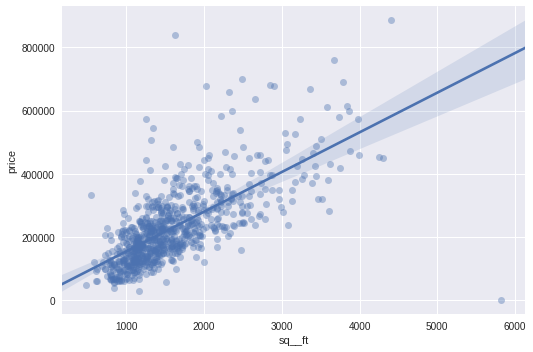

In [127]:
# to visualize the data with regression line for price vs sqft
sns.lmplot(x='sq__ft', y='price', data=housing, aspect=1.5, scatter_kws={'alpha':0.4});

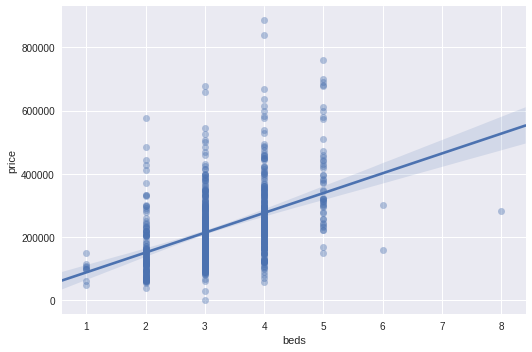

In [128]:
# to visualize the data with regression line for price vs beds
sns.lmplot(x='beds', y='price', data=housing, aspect=1.5, scatter_kws={'alpha':0.4});

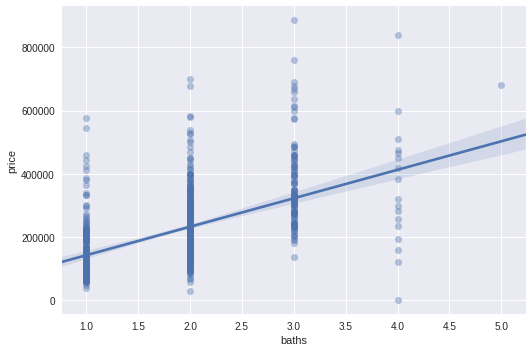

In [129]:
# to visualize the data with regression line for price vs baths
sns.lmplot(x='baths', y='price', data=housing, aspect=1.5, scatter_kws={'alpha':0.4});

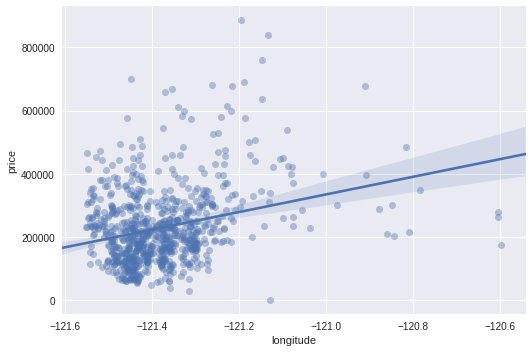

In [130]:
# to visualize the data with regression line for price vs longitude
sns.lmplot(x='longitude', y='price', data=housing, aspect=1.5, scatter_kws={'alpha':0.4});

In [131]:
# to see how many days are there in sale date column.
housing['sale_date'].value_counts()

2008-05-16    215
2008-05-19    197
2008-05-20    146
2008-05-21    146
2008-05-15    109
Name: sale_date, dtype: int64

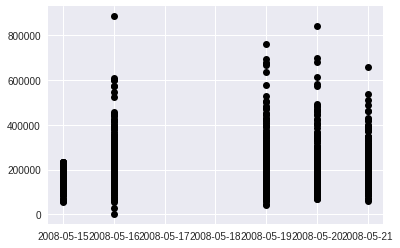

In [132]:
# to visualize the data for sale date , to see the selling trend
plt.plot(housing['sale_date'],housing['price'],'ko')
plt.show()

### 4. Which SINGLE variable would be the best predictor of Y in a SLR model? Why?

#### <font color='darkred'>Ans: According to my opinion after analyzing the data,  sq__ft is the best predictor  of price. As it has most correlated variable in the positive way and can help predict the price with least error when compared to other input variables. </font> 

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**
- **Report its score.**

In [0]:
# A:# Create X and y.
feature_cols = ['sq__ft']
X = housing[feature_cols]
y = housing.price

In [134]:
# Check X's type.
print((type(X)))
print((type(X.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [135]:
# Check y's type.
print((type(y)))
print((type(y.values)))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [136]:
# Check X's shape (number of observations,  number of features).
print(X.shape)

(813, 1)


In [137]:
# Check y's shape (single dimension with length n).
print(y.shape)

(813,)


In [0]:
from sklearn.linear_model import LinearRegression

In [139]:
# instantiate an object out of the LinearRegression class .
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

In [140]:
#Fit the model(Linear regression) using the input and target variables.
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
# housing[housing['sq__ft'] == 836]


In [141]:
# Checking the model prediction values using the predict method of sklearn.
X_new = [[836], [1100]]
lr.predict(X_new)

array([134747.0183593 , 167829.96255913])

In [142]:
# To evaluate how well the trained model is, i.e., The training error.
lr.score(X,y)

0.4814995615437454

### 6. Interpret the intercept. Interpret the slope.

In [143]:
# A: Slope and Intercept are given below for simple linear regression model.
print(lr.intercept_)
print(lr.coef_)

29984.361726519826
[125.31418258]


### 7. Give a real life example of how this model could help people in prediction. Also give an example that the model can be used for inference purpose. You should consider non-technical people as users in your example.

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

**Real life Example**

> When a person wants to buy a home near sacramento. This dataset and prediction can be of great help for him. He can input approximate sqft he is looking for and can get the predicted price of house(which I can say is 48 percent accurate prediction).
> For a real estate agent who is involved in selling homes in and around sacramento area can use this prediction to help his clients showing the actual trends and can give them approximate while bidding.

**Inference Purpose**

> It can be inferred from the model that as the size of the house increases the price also increases. The hypothesis is size of the house is linearly proportional to the amount of money spent to buy it.



### 8: Using the model you came up with in Problem 5, calculate the residuals (MSE) and plot the targets vs. the prediction with the linear regression line.

In [144]:
# A: calculated mean squared error
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y, lr.predict(X)))

MSE: 7444498109.2912245


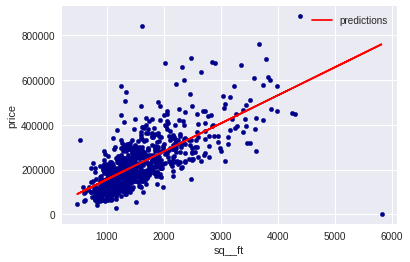

In [145]:
# plot of price vs sqft with a regression line.
predictions  =  lr.predict(X)
score        =  lr.score(X,y)
housing['predictions'] = predictions

ax1 = housing.plot(kind='scatter',x='sq__ft', y='price', color='darkblue')
housing.plot(kind='line',x='sq__ft', y='predictions', color='red',ax=ax1)